# Aviation Accidents Analysis

You are part of a consulting firm that is tasked to do an analysis of commercial and passenger jet airline safety. The client (an airline/airplane insurer) is interested in knowing what types of aircraft (makes/models) exhibit low rates of total destruction and low likelihood of fatal or serious passenger injuries in the event of an accident. They are also interested in any general variables/conditions that might be at play. Your analysis will be based off of aviation accident data accumulated from the years 1948-2023. 

Our client is only interested in airplane makes/models that are professional builds and could potentially still be active. Assume a max lifetime of 40 years for a make/model retirement and make sure to filter your data accordingly (i.e. from 1983 onwards). They would also like separate recommendations for small aircraft vs. larger passenger models. **In addition, make sure that claims that you make are statistically robust and that you have enough samples when making comparisons between groups.**


In this summative assessment you will demonstrate your ability to:
- Use Pandas to load, inspect, and clean the dataset appropriately. 
- Transform relevant columns to create measures that address the problem at hand.
- **conduct EDA: visualization and statistical measures to understand the structure of the data**
- **recommend a set of manufacturers to consider as well as specific airplanes conforming to the client's request**
- **discuss the relationship between serious injuries/airplane damage incurred and at least *two* factors at play in the incident. You must provide supporting evidence (visuals, summary statistics, tables) for each claim you make.**

In [1]:
# loading relevant packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Exploratory Data Analysis  
- Load in the cleaned data

In [ ]:
cleaned_aviation_df = pd.read_csv('./data/cleaned_aviation_data.csv')

print(cleaned_aviation_df.shape)
print(cleaned_aviation_df.dtypes)
print(cleaned_aviation_df.head())

         Event.Id Investigation.Type Accident.Number  Event.Date  \
0  20001213X33306           Accident      LAX86LA166  1986-04-08   
1  20001213X33276           Accident     FTW86FA066B  1986-04-15   
2  20001213X33276           Accident     FTW86FA066A  1986-04-15   
3  20001213X33697           Accident     SEA86FA121B  1986-05-19   
4  20001213X33697           Accident     SEA86FA121A  1986-05-19   

       Location        Country Latitude Longitude Injury.Severity  \
0      MESA, AZ  United States      NaN       NaN       Non-Fatal   
1  HANKAMER, TX  United States      NaN       NaN        Fatal(2)   
2  HANKAMER, TX  United States      NaN       NaN        Fatal(2)   
3      MEAD, WA  United States      NaN       NaN        Fatal(2)   
4      MEAD, WA  United States      NaN       NaN        Fatal(2)   

  Aircraft.damage  ... Total.Fatal.Injuries Total.Serious.Injuries  \
0     Substantial  ...                  0.0                    0.0   
1       Destroyed  ...              

## Explore safety metrics across models/makes
- Remember that the client is interested in separate recommendations for smaller airplanes and larger airplanes. Choose a passenger threshold of 20 and separate the plane types. 

In [12]:
# Inspect Total.Passengers distribution first
print(cleaned_aviation_df['Total.Passengers'].describe())
print(f"\nPassengers <= 20: {(cleaned_aviation_df['Total.Passengers'] <= 20).sum()}")
print(f"Passengers > 20: {(cleaned_aviation_df['Total.Passengers'] > 20).sum()}")
print(f"Passengers NaN: {cleaned_aviation_df['Total.Passengers'].isna().sum()}")
# No NaNs to clean. Let's split into small and large airplane dataframes
small_planes_df = cleaned_aviation_df[cleaned_aviation_df['Total.Passengers'] <= 20].copy()
large_planes_df = cleaned_aviation_df[cleaned_aviation_df['Total.Passengers'] > 20].copy()
print(f"Small planes: {small_planes_df.shape[0]}")
print(f"Large planes: {large_planes_df.shape[0]}")

count    17855.000000
mean         9.178885
std         37.359168
min          0.000000
25%          1.000000
50%          2.000000
75%          2.000000
max        576.000000
Name: Total.Passengers, dtype: float64

Passengers <= 20: 16984
Passengers > 20: 871
Passengers NaN: 0
Small planes: 16984
Large planes: 871


#### Analyzing Makes

Explore the human injury risk profile for small and larger Makes:
- choose the 15 makes for each group possessing the lowest mean fatal/seriously injured fraction
- plot the mean fatal/seriously injured fraction for each of these subgroups side-by-side

Top 15 Safest Makes - Small Planes:
Make
BOMBARDIER INC                    0.090909
MCDONNELL DOUGLAS                 0.094048
BOMBARDIER                        0.111264
BOEING                            0.141453
AVIAT AIRCRAFT INC                0.164474
MAULE                             0.164806
GRUMMAN ACFT ENG COR-SCHWEIZER    0.206897
AYRES                             0.215686
STINSON                           0.216408
AVIAT                             0.221429
BELLANCA                          0.222603
DIAMOND AIRCRAFT IND INC          0.222973
ROCKWELL INTERNATIONAL            0.223684
AERONCA                           0.225833
DEHAVILLAND                       0.231652
Name: Serious.Fatal.Injury.Rate, dtype: float64

Top 15 Safest Makes - Large Planes:
Make
MCDONNELL DOUGLAS    0.007827
BOMBARDIER INC       0.028690
BOEING               0.056979
BOMBARDIER           0.063701
EMBRAER              0.065274
AIRBUS               0.086249
Name: Serious.Fatal.Injury.Rate, dtype: floa

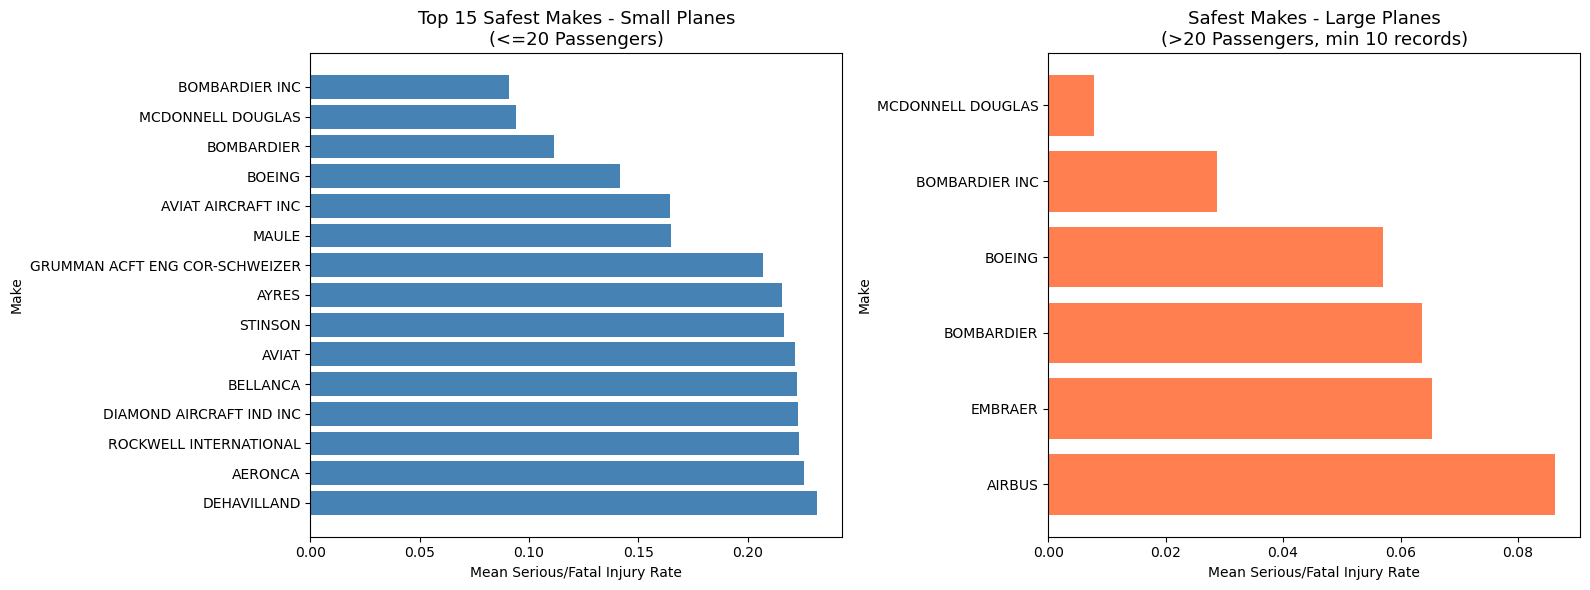

In [21]:
# Calculate mean Serious.Fatal.Injury.Rate per Make for each group
# Add minimum record threshold like at least 10 accidents to make the ranking statistically meaningful, 
# because there are a few large planes with 0.0 mean
small_make_risk = (small_planes_df.groupby('Make')
                    .filter(lambda x: len(x) >= 10)
                   .groupby('Make')['Serious.Fatal.Injury.Rate']
                   .mean()
                   .sort_values()
                   .head(15))

large_make_risk = (large_planes_df.groupby('Make')
                   .filter(lambda x: len(x) >= 10)
                   .groupby('Make')['Serious.Fatal.Injury.Rate']
                   .mean()
                   .sort_values()
                   .head(15))

print("Top 15 Safest Makes - Small Planes:")
print(small_make_risk)
print("\nTop 15 Safest Makes - Large Planes:")
print(large_make_risk)

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Small planes
axes[0].barh(small_make_risk.index[::-1], small_make_risk.values[::-1], color='steelblue')
axes[0].set_title('Top 15 Safest Makes - Small Planes\n(<=20 Passengers)', fontsize=13)
axes[0].set_xlabel('Mean Serious/Fatal Injury Rate')
axes[0].set_ylabel('Make')

# Large planes - only 6 makes meet the threshold
axes[1].barh(large_make_risk.index[::-1], large_make_risk.values[::-1], color='coral')
axes[1].set_title('Safest Makes - Large Planes\n(>20 Passengers, min 10 records)', fontsize=13)
axes[1].set_xlabel('Mean Serious/Fatal Injury Rate')
axes[1].set_ylabel('Make')

plt.tight_layout()
plt.show()


**Distribution of injury rates: small makes**

Use a violinplot to look at the distribution of the fraction of passengers serious/fatally injured for small airplane makes. Just display makes with the ten lowest mean serious/fatal injury rates.

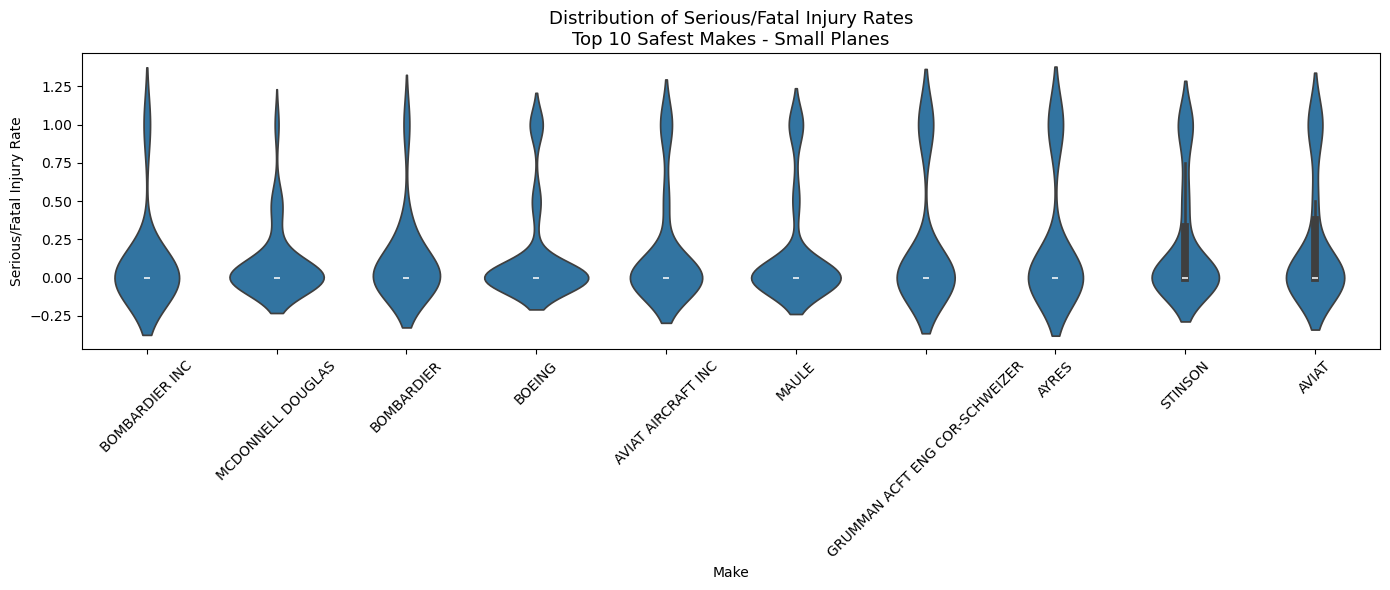

In [25]:
# Get top 10 safest makes for small planes
top10_small_makes = (small_planes_df.groupby('Make')
                     .filter(lambda x: len(x) >= 10)
                     .groupby('Make')['Serious.Fatal.Injury.Rate']
                     .mean()
                     .sort_values()
                     .head(10)
                     .index)

# Filter small planes df to only these makes
top10_small_df = small_planes_df[small_planes_df['Make'].isin(top10_small_makes)]

# Order makes by mean injury rate for cleaner visualization
make_order = (top10_small_df.groupby('Make')['Serious.Fatal.Injury.Rate']
              .mean()
              .sort_values()
              .index)

# Violin plot
plt.figure(figsize=(14, 6))
sns.violinplot(data=top10_small_df, 
               x='Make', 
               y='Serious.Fatal.Injury.Rate',
               order=make_order)

plt.title('Distribution of Serious/Fatal Injury Rates\nTop 10 Safest Makes - Small Planes', fontsize=13)
plt.xlabel('Make')
plt.ylabel('Serious/Fatal Injury Rate')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Distribution of injury rates: large makes**

Use a stripplot to look at the distribution of the fraction of passengers serious/fatally injured for large airplane makes. Just display makes with the ten lowest mean serious/fatal injury rates.

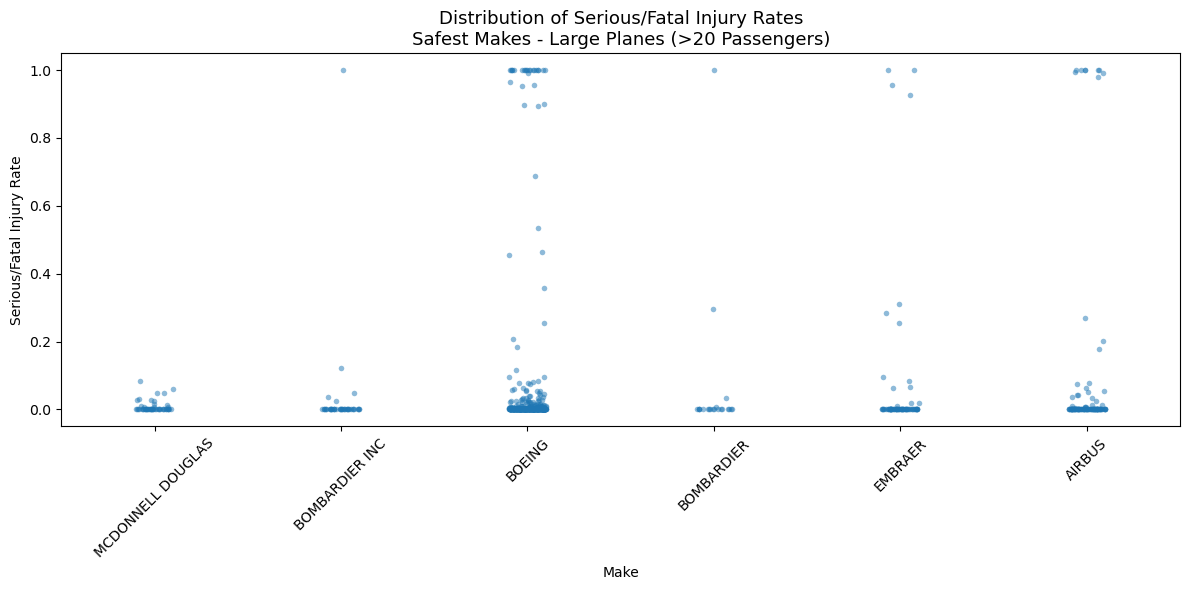

In [29]:
# Get safest makes for large planes (all 6 that meet threshold above)
top_large_makes = (large_planes_df.groupby('Make')
                   .filter(lambda x: len(x) >= 10)
                   .groupby('Make')['Serious.Fatal.Injury.Rate']
                   .mean()
                   .sort_values()
                   .head(10)
                   .index)

# Filter large planes df to only these makes
top_large_df = large_planes_df[large_planes_df['Make'].isin(top_large_makes)]

# Order makes by mean injury rate
make_order_large = (top_large_df.groupby('Make')['Serious.Fatal.Injury.Rate']
                    .mean()
                    .sort_values()
                    .index)

# Strip plot
plt.figure(figsize=(12, 6))
sns.stripplot(data=top_large_df,
              x='Make',
              y='Serious.Fatal.Injury.Rate',
              order=make_order_large,
              alpha=0.5,
              size=4)

plt.title('Distribution of Serious/Fatal Injury Rates\nSafest Makes - Large Planes (>20 Passengers)', fontsize=13)
plt.xlabel('Make')
plt.ylabel('Serious/Fatal Injury Rate')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Evaluate the rate of aircraft destruction for both small and large aircraft by Make.** 

Sort your results and keep the lowest 15.

Top 15 Lowest Destruction Rates - Small Planes:
Make
LUSCOMBE                          0.014184
GRUMMAN ACFT ENG COR-SCHWEIZER    0.017241
STINSON                           0.023256
AIRBUS                            0.026316
TAYLORCRAFT                       0.032258
AERONCA                           0.035000
BOMBARDIER                        0.035714
BOEING                            0.036111
AMERICAN CHAMPION AIRCRAFT        0.038462
ERCOUPE                           0.038462
AVIAT AIRCRAFT INC                0.039474
MAULE                             0.041860
DEHAVILLAND                       0.043011
BOMBARDIER INC                    0.045455
BELLANCA                          0.050228
Name: Was.Destroyed, dtype: float64

Lowest Destruction Rates - Large Planes:
Make
BOMBARDIER INC       0.023256
BOMBARDIER           0.047619
BOEING               0.049541
EMBRAER              0.051282
MCDONNELL DOUGLAS    0.075472
AIRBUS               0.076271
Name: Was.Destroyed, dtype: float64


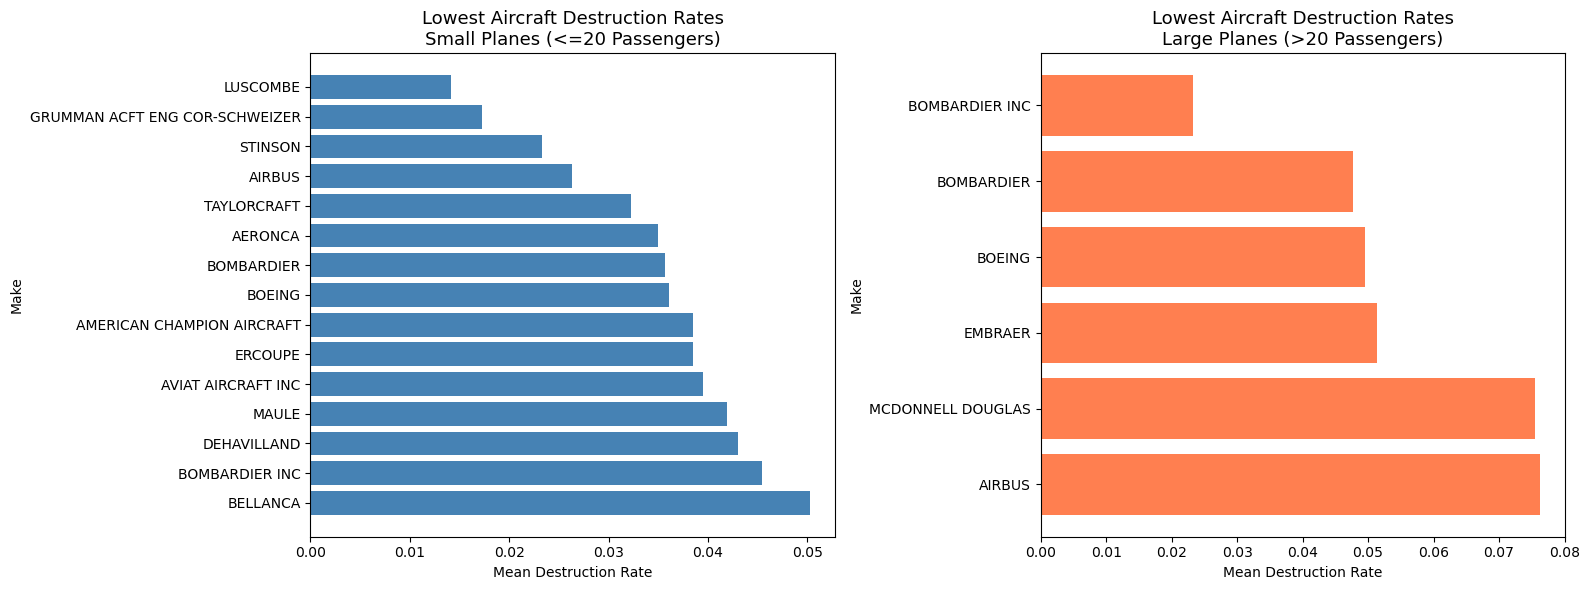

In [30]:
# Calculate mean Was.Destroyed rate per Make for each group
small_make_destroyed = (small_planes_df.groupby('Make')
                        .filter(lambda x: len(x) >= 10)
                        .groupby('Make')['Was.Destroyed']
                        .mean()
                        .sort_values()
                        .head(15))

large_make_destroyed = (large_planes_df.groupby('Make')
                        .filter(lambda x: len(x) >= 10)
                        .groupby('Make')['Was.Destroyed']
                        .mean()
                        .sort_values()
                        .head(10))

print("Top 15 Lowest Destruction Rates - Small Planes:")
print(small_make_destroyed)
print("\nLowest Destruction Rates - Large Planes:")
print(large_make_destroyed)

# Plot side by side
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Small planes
axes[0].barh(small_make_destroyed.index[::-1], small_make_destroyed.values[::-1], color='steelblue')
axes[0].set_title('Lowest Aircraft Destruction Rates\nSmall Planes (<=20 Passengers)', fontsize=13)
axes[0].set_xlabel('Mean Destruction Rate')
axes[0].set_ylabel('Make')

# Large planes
axes[1].barh(large_make_destroyed.index[::-1], large_make_destroyed.values[::-1], color='coral')
axes[1].set_title('Lowest Aircraft Destruction Rates\nLarge Planes (>20 Passengers)', fontsize=13)
axes[1].set_xlabel('Mean Destruction Rate')
axes[1].set_ylabel('Make')

plt.tight_layout()
plt.show()

#### Provide a short discussion on your findings for your summary statistics and plots:
- Make any recommendations for Makes here based off of the destroyed fraction and fraction fatally/seriously injured
- Comment on the calculated statistics and any corresponding distributions you have visualized.

## Findings: Safety Analysis by Make

### Small Aircraft (≤20 Passengers)
Cross-referencing injury rates and destruction rates, **AVIAT AIRCRAFT INC** and **MAULE** 
are the strongest recommendations, both appear in the top 15 for lowest injury rate (~0.16) 
and lowest destruction rate (~0.04). **BOEING** and **BOMBARDIER** lead on injury rates but 
likely reflect corporate jets rather than typical general aviation purchases.

### Large Aircraft (>20 Passengers)
**BOMBARDIER INC** leads on destruction rate (0.023) while **MCDONNELL DOUGLAS** leads on 
injury rate (0.008). **BOEING** and **EMBRAER** perform consistently well on both metrics 
and represent the most balanced options for the client.

### Recommendations
- **Small aircraft**: AVIAT AIRCRAFT INC and MAULE offer the best combined safety profile 
among accessible general aviation manufacturers.
- **Large aircraft**: BOMBARDIER INC and MCDONNELL DOUGLAS lead on their respective metrics, 
with BOEING and EMBRAER as strong all-round alternatives.

### Analyze plane types
- plot the mean fatal/seriously injured fraction for both small and larger planes 
- also provide a distributional plot of your choice for the fatal/seriously injured fraction by airplane type (stripplot, violin, etc)  
- filter ensuring that you have at least ten individual examples in each model/make to average over

**Larger planes**

Safest Models - Large Planes:
Make.Model
BOEING 777                    0.000821
BOEING 757                    0.001473
BOEING 787                    0.003058
BOEING 737-7H4                0.003242
BOMBARDIER INC CL-600-2B19    0.004431
EMBRAER EMB145                0.008798
EMBRAER EMB-145LR             0.010000
BOEING 747                    0.025478
BOEING 767                    0.046963
BOEING 737 7H4                0.068121
BOEING 737                    0.081223
AIRBUS A320                   0.126694
AIRBUS A330                   0.137080
AIRBUS A321                   0.200000
Name: Serious.Fatal.Injury.Rate, dtype: float64

Total models meeting threshold: 14


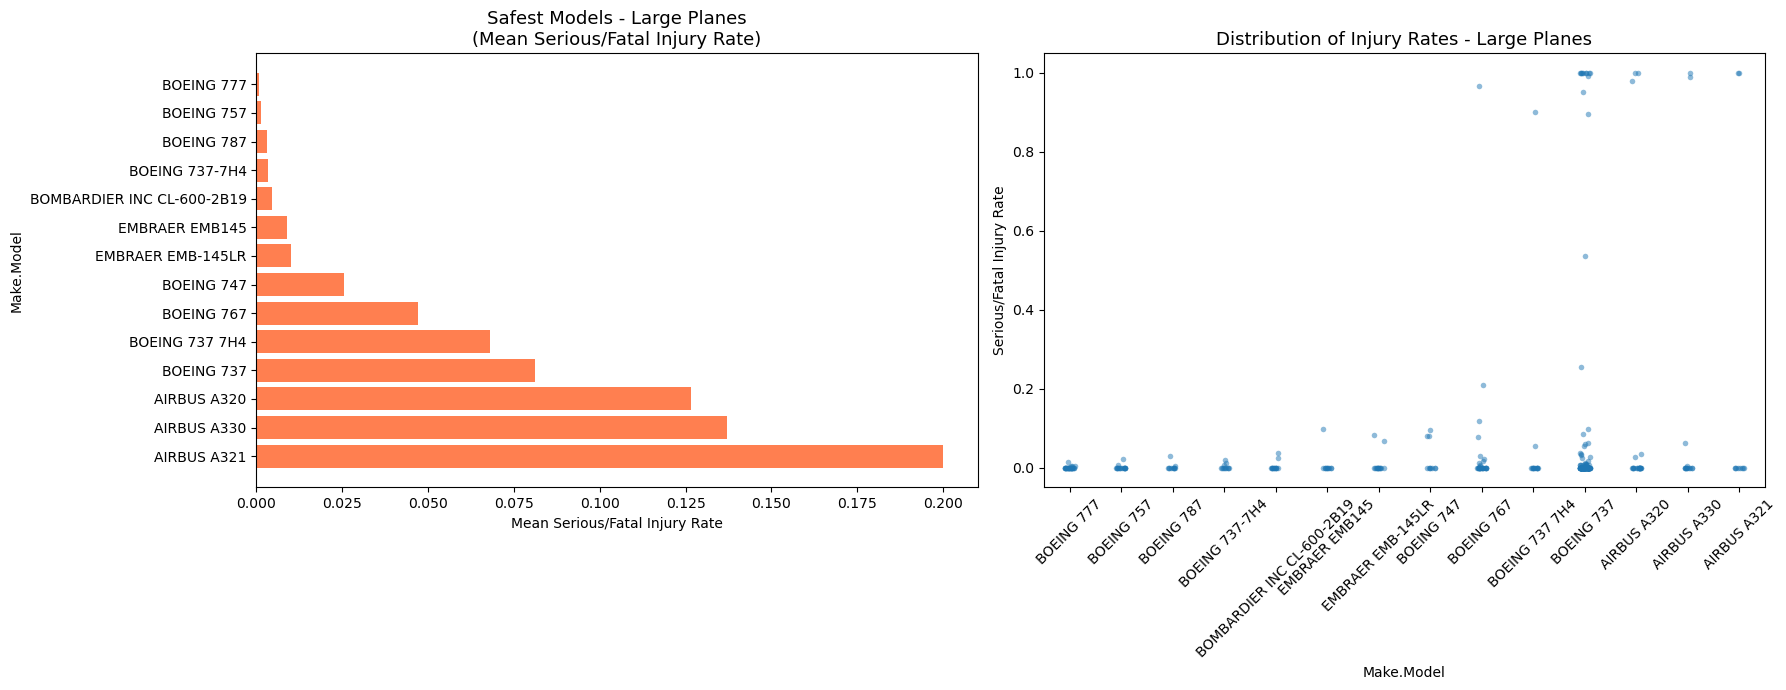

In [37]:
# Calculate mean Serious.Fatal.Injury.Rate per Make.Model for large planes
large_model_risk = (large_planes_df.groupby('Make.Model')
                    .filter(lambda x: len(x) >= 10)
                    .groupby('Make.Model')['Serious.Fatal.Injury.Rate']
                    .mean()
                    .sort_values())

print("Safest Models - Large Planes:")
print(large_model_risk)
print(f"\nTotal models meeting threshold: {len(large_model_risk)}")

# Filter large planes df to qualifying models
large_model_df = large_planes_df[large_planes_df['Make.Model'].isin(large_model_risk.index)]
model_order_large = large_model_risk.index

fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# Mean injury rate bar chart
axes[0].barh(model_order_large[::-1], large_model_risk.values[::-1], color='coral')
axes[0].set_title('Safest Models - Large Planes\n(Mean Serious/Fatal Injury Rate)', fontsize=13)
axes[0].set_xlabel('Mean Serious/Fatal Injury Rate')
axes[0].set_ylabel('Make.Model')

# Strip plot for distribution
sns.stripplot(data=large_model_df,
              x='Make.Model',
              y='Serious.Fatal.Injury.Rate',
              order=model_order_large,
              jitter=True,
              alpha=0.5,
              size=4,
              ax=axes[1])
axes[1].set_title('Distribution of Injury Rates - Large Planes', fontsize=13)
axes[1].set_xlabel('Make.Model')
axes[1].set_ylabel('Serious/Fatal Injury Rate')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

**Smaller planes**
- for smaller planes, limit your plotted results to the makes with the 10 lowest mean serious/fatal injury fractions

Top 10 Safest Models - Small Planes (min 50 records):
Make.Model
BOEING 747      0.076923
BOEING 737      0.083333
CESSNA 170      0.111486
CESSNA 180      0.112285
PIPER PA-18     0.118750
CESSNA 172RG    0.123636
CESSNA 172P     0.127778
CESSNA A185     0.141026
CESSNA 170B     0.143302
CESSNA 172R     0.146417
Name: Serious.Fatal.Injury.Rate, dtype: float64

Record counts:
Make.Model
BOEING 747       57
BOEING 737      240
CESSNA 170       74
CESSNA 180      213
PIPER PA-18      80
CESSNA 172RG     56
CESSNA 172P     142
CESSNA A185      65
CESSNA 170B     107
CESSNA 172R     109
dtype: int64


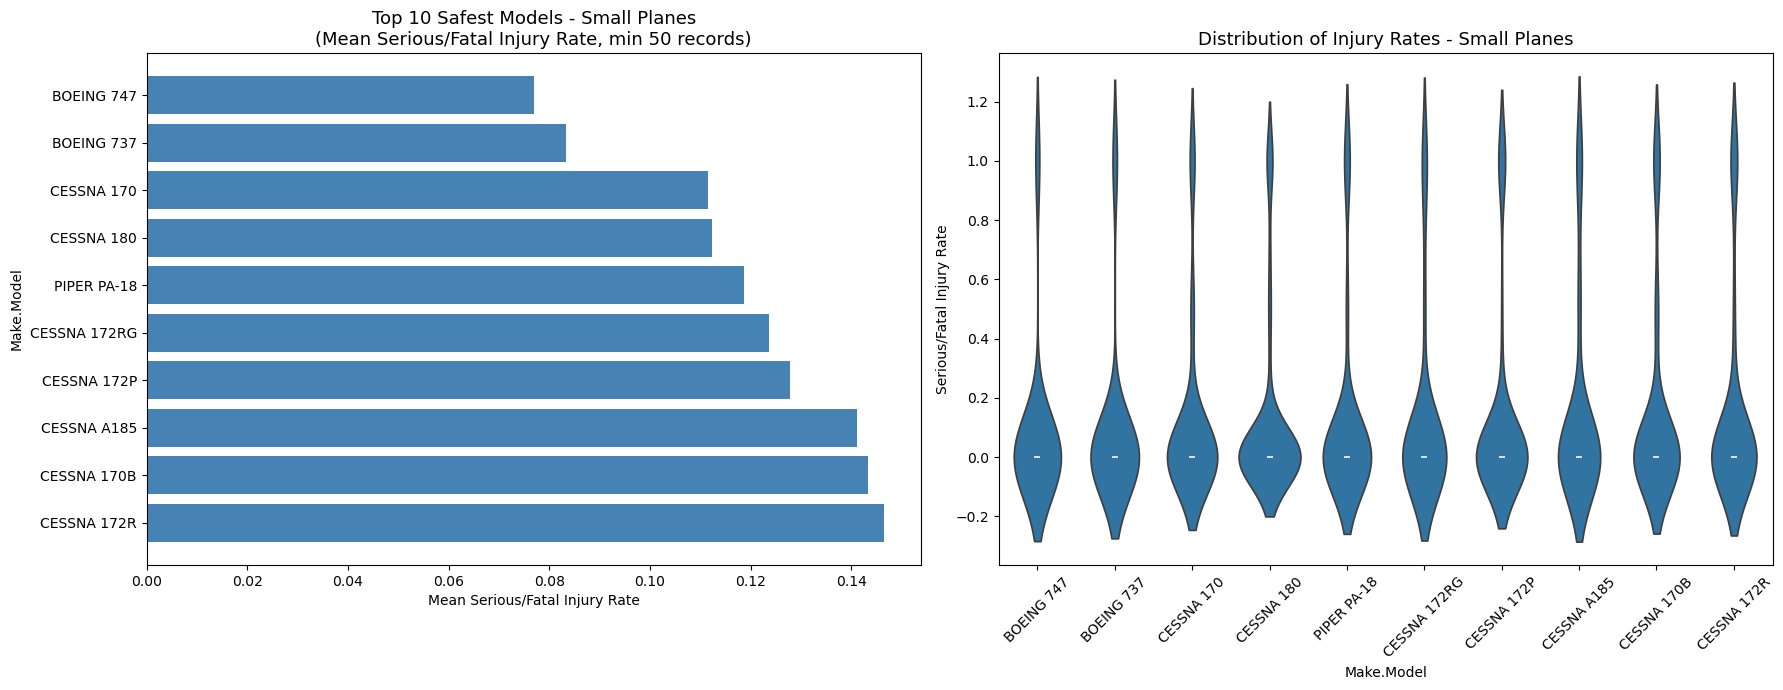

In [38]:
# Raise threshold to 50 records for more statistically meaningful results
small_model_risk = (small_planes_df.groupby('Make.Model')
                    .filter(lambda x: len(x) >= 50)
                    .groupby('Make.Model')['Serious.Fatal.Injury.Rate']
                    .mean()
                    .sort_values()
                    .head(10))

print("Top 10 Safest Models - Small Planes (min 50 records):")
print(small_model_risk)
print(f"\nRecord counts:")
print(small_planes_df.groupby('Make.Model')
      .filter(lambda x: len(x) >= 50)
      .groupby('Make.Model').size()
      .loc[small_model_risk.index])

# Filter small planes df to top 10 models
small_model_df = small_planes_df[small_planes_df['Make.Model'].isin(small_model_risk.index)]
model_order_small = small_model_risk.index

fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# Mean injury rate bar chart
axes[0].barh(model_order_small[::-1], small_model_risk.values[::-1], color='steelblue')
axes[0].set_title('Top 10 Safest Models - Small Planes\n(Mean Serious/Fatal Injury Rate, min 50 records)', fontsize=13)
axes[0].set_xlabel('Mean Serious/Fatal Injury Rate')
axes[0].set_ylabel('Make.Model')

# Violin plot for distribution
sns.violinplot(data=small_model_df,
               x='Make.Model',
               y='Serious.Fatal.Injury.Rate',
               order=model_order_small,
               ax=axes[1])
axes[1].set_title('Distribution of Injury Rates - Small Planes', fontsize=13)
axes[1].set_xlabel('Make.Model')
axes[1].set_ylabel('Serious/Fatal Injury Rate')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

### Discussion of Specific Airplane Types
- Discuss what you have found above regarding passenger fraction seriously/ both small and large airplane models.

## Findings: Safety Analysis by Model

### Large Aircraft (>20 Passengers)
Boeing dominates the safest large aircraft models, with the **777**, **757**, and **787** 
posting near-zero injury rates (<0.005). The **BOMBARDIER CL-600-2B19** and **EMBRAER EMB145** 
are strong non-Boeing alternatives at under 0.01. Airbus models sit at the higher end of the 
group, with the **A321** at 0.20 being an outlier likely driven by a small number of 
high-severity incidents. **BOEING 737-7H4** and **BOEING 737 7H4** appear to be the same 
model with inconsistent naming and should be consolidated.

### Small Aircraft (≤20 Passengers)
**CESSNA** dominates with 6 of the top 10 safest models. **CESSNA 170**, **CESSNA 180**, 
and **PIPER PA-18** lead with injury rates around 0.11-0.12, all backed by solid record 
counts (74-213). The **CESSNA 172** family appears three times (172P, 172RG, 172R), 
collectively reinforcing it as one of the most consistently safe general aviation aircraft.
Boeing 747 and 737 appear due to likely data inconsistencies and should be excluded from 
general aviation recommendations.

### Recommendations
- **Large aircraft**: BOEING 777, 757, or 787 for lowest injury risk.
- **Small aircraft**: CESSNA 170, CESSNA 180, PIPER PA-18, or any CESSNA 172 variant.

### Exploring Other Variables
- Investigate how other variables effect aircraft damage and injury. You must choose **two** factors out of the following but are free to analyze more:

- Weather Condition
- Engine Type
- Number of Engines
- Phase of Flight
- Purpose of Flight

For each factor provide a discussion explaining your analysis with appropriate visualization / data summaries and interpreting your findings.


--- Weather.Condition ---
                   Serious.Fatal.Injury.Rate  Was.Destroyed
Weather.Condition                                          
IMC                                    0.627          0.348
Unknown                                0.427          0.263
VMC                                    0.233          0.071
Weather.Condition
VMC        14274
NaN         2413
IMC          906
Unknown      262
Name: count, dtype: int64

--- Number.of.Engines ---
                   Serious.Fatal.Injury.Rate  Was.Destroyed
Number.of.Engines                                          
1.0                                    0.256          0.077
2.0                                    0.276          0.136
3.0                                    0.086          0.040
4.0                                    0.142          0.091
Number.of.Engines
1.0    13209
2.0     2454
NaN     2101
4.0       66
3.0       25
Name: count, dtype: int64


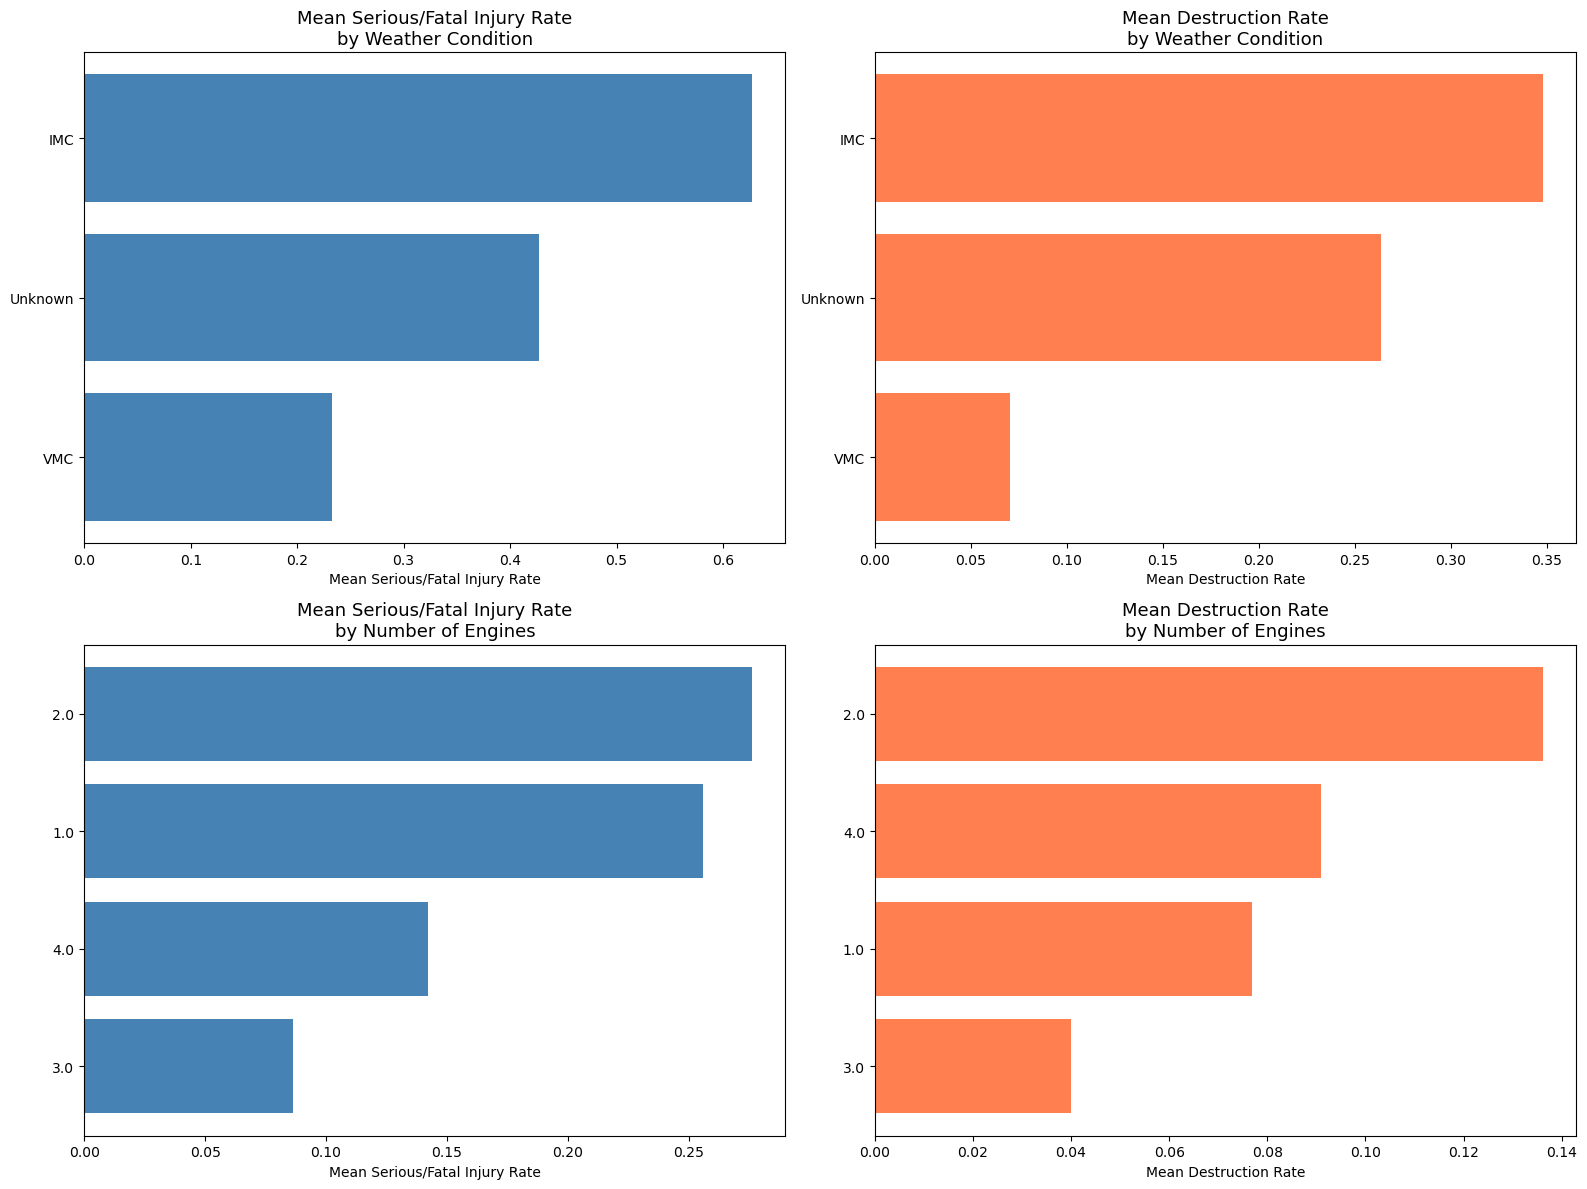

Weather.Condition
VMC        0.233122
Unknown    0.427316
IMC        0.627308
Name: Serious.Fatal.Injury.Rate, dtype: float64 Weather.Condition
VMC        0.070688
Unknown    0.263359
IMC        0.347682
Name: Was.Destroyed, dtype: float64
Number.of.Engines
3.0    0.086449
4.0    0.141934
1.0    0.255808
2.0    0.276094
Name: Serious.Fatal.Injury.Rate, dtype: float64 Number.of.Engines
3.0    0.040000
1.0    0.076842
4.0    0.090909
2.0    0.136104
Name: Was.Destroyed, dtype: float64


In [ ]:
# Inspect both factors against our two key metrics
# Inspect both factors against our two key metrics
for col in ['Weather.Condition', 'Number.of.Engines']:
    print(f"\n--- {col} ---")
    print(cleaned_aviation_df.groupby(col)[['Serious.Fatal.Injury.Rate', 'Was.Destroyed']].mean().round(3))
    print(cleaned_aviation_df[col].value_counts(dropna=False))

    plt.close('all')
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# --- Weather Condition ---
weather_injury = (cleaned_aviation_df.groupby('Weather.Condition')['Serious.Fatal.Injury.Rate']
                  .mean().sort_values())
weather_destroyed = (cleaned_aviation_df.groupby('Weather.Condition')['Was.Destroyed']
                     .mean().sort_values())

axes[0, 0].barh(weather_injury.index, weather_injury.values, color='steelblue')
axes[0, 0].set_title('Mean Serious/Fatal Injury Rate\nby Weather Condition', fontsize=13)
axes[0, 0].set_xlabel('Mean Serious/Fatal Injury Rate')

axes[0, 1].barh(weather_destroyed.index, weather_destroyed.values, color='coral')
axes[0, 1].set_title('Mean Destruction Rate\nby Weather Condition', fontsize=13)
axes[0, 1].set_xlabel('Mean Destruction Rate')

# --- Number of Engines ---
engine_injury = (cleaned_aviation_df.groupby('Number.of.Engines')['Serious.Fatal.Injury.Rate']
                 .mean().sort_values())
engine_destroyed = (cleaned_aviation_df.groupby('Number.of.Engines')['Was.Destroyed']
                    .mean().sort_values())

axes[1, 0].barh(engine_injury.index.astype(str), engine_injury.values, color='steelblue')
axes[1, 0].set_title('Mean Serious/Fatal Injury Rate\nby Number of Engines', fontsize=13)
axes[1, 0].set_xlabel('Mean Serious/Fatal Injury Rate')

axes[1, 1].barh(engine_destroyed.index.astype(str), engine_destroyed.values, color='coral')
axes[1, 1].set_title('Mean Destruction Rate\nby Number of Engines', fontsize=13)
axes[1, 1].set_xlabel('Mean Destruction Rate')

plt.tight_layout()
plt.show()

## Findings: Effect of Weather Condition and Number of Engines on Safety

### Weather Condition
Weather condition shows the strongest and clearest relationship with safety outcomes 
in the dataset. Accidents occurring in **IMC (Instrument Meteorological Conditions)**  
low visibility, clouds, fog show a mean serious/fatal injury rate of **0.627** and a 
destruction rate of **0.348**, compared to **VMC (Visual Meteorological Conditions)** at 
**0.233** and **0.071** respectively. This means IMC accidents are nearly **3x more likely** 
to result in serious/fatal injuries and **5x more likely** to result in aircraft destruction.

This is a strong signal for the client, prioritizing aircraft with strong instrument 
flight ratings and avionics, and avoiding operations in poor weather conditions, 
significantly reduces risk exposure.

### Number of Engines
The relationship between number of engines and safety outcomes is less intuitive. 
**Single-engine aircraft** (0.256 injury rate, 0.077 destruction rate) actually 
outperform **twin-engine aircraft** (0.276 injury rate, 0.136 destruction rate) on 
both metrics. This likely reflects the fact that twin-engine aircraft tend to be larger 
and more complex, and are often flown in more demanding conditions.

**3-engine aircraft** show the lowest injury rate (0.086) and destruction rate (0.040), 
though with only 25 records this result is not statistically reliable and should be 
treated with caution. **4-engine aircraft** perform consistently well (0.142 injury rate, 
0.091 destruction rate) and have a more reliable sample of 66 records.

The key takeaway for the client is that more engines does not necessarily mean safer, 
operational context and pilot proficiency likely play a larger role than engine count alone.